# **Supply Chain Shipment Pricing Data - Data Analysis and Modeling**

Dataset Description: This data set provides supply chain health commodity shipment and pricing data. 

**File Descriptions**

Item|Description
---|---
**File Name :**|SCMS_Delivery_History_Dataset.csv
**File Size :**|Approx. 570kb
**Total Records :**|10,324
**File Updated :**|February 24, 2016

## Following are steps for Data Analysis and Modeling

* Import Packages
* Import CSV file
* Check Total Records in CSV file
* Check DataType of CSV file
* Rename columns
* Print first 5 and last 5 recods from DataSet
* Total 16 Country wise count with graph
* Shipment Mode percentage wise Pie Chart
* Modeling
* Conclusion


# Import Packages

In [105]:
import os

import pandas as pd
import numpy as np
from decimal import Decimal
from IPython.display import Image
import re

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 9999
pd.options.display.float_format = '{:20,.2f}'.format

from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

export_flag = False
if export_flag:
    import chart_studio
    chart_studio.tools.set_credentials_file(username='jr.cinco5', api_key='9197r3roMkAbXG3iwTy3')

# Import CSV file

In [106]:
DataSet = pd.read_csv('SCMS_Delivery_History_Dataset.csv').fillna('no_value')

# Check Total Records in CSV file

In [107]:
TotalRowCount = len(DataSet)
print("Total Number of Data Count :", TotalRowCount)

Total Number of Data Count : 10324


# Check DataType of CSV file

In [108]:
DataSet.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


# Rename columns

In [109]:
DataSet.rename(columns={"Freight Cost (USD)": "Freight_Cost_USD"}, inplace=True)

# Print first 5 and last 5 recods from DataSet

In [110]:
DataSet[['Unit of Measure (Per Pack)', 'Line Item Quantity', 'Pack Price', 'Unit Price', 'Weight (Kilograms)',
                          'Country', 'Shipment Mode', 'Freight_Cost_USD']]

,Unit of Measure (Per Pack),Line Item Quantity,Pack Price,Unit Price,Weight (Kilograms),Country,Shipment Mode,Freight_Cost_USD
0,30,19,29.00,0.97,13,Côte d'Ivoire,Air,780.34
1,240,1000,6.20,0.03,358,Vietnam,Air,4521.5
2,100,500,80.00,0.80,171,Côte d'Ivoire,Air,1653.78
3,60,31920,3.99,0.07,1855,Vietnam,Air,16007.06
4,60,38000,3.20,0.05,7590,Vietnam,Air,45450.08
...,...,...,...,...,...,...,...,...
10319,60,166571,3.60,0.06,See DN-4307 (ID#:83920),Zimbabwe,Truck,See DN-4307 (ID#:83920)
10320,60,21072,6.52,0.11,See DN-4313 (ID#:83921),Côte d'Ivoire,Truck,See DN-4313 (ID#:83921)
10321,30,514526,9.99,0.33,Weight Captured Separately,Zambia,Truck,Freight Included in Commodity Cost
10322,60,17465,6.52,0.11,1392,Zimbabwe,Truck,Freight Included in Commodity Cost


# Total 16 Country wise count with graph

Top 43 Countries Wise Count 

South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Sudan                   46
Swaziland               35
Mali                    17
Pakistan                15
Guatemala               15
Malawi                  14
Benin                   13
Lebanon                  8
Libya                    8
Angola                   7
Liberia                  6
Lesotho                  4
Sierra Leone             4
Afghanistan              

Text(0.5, 0, 'Country Name')

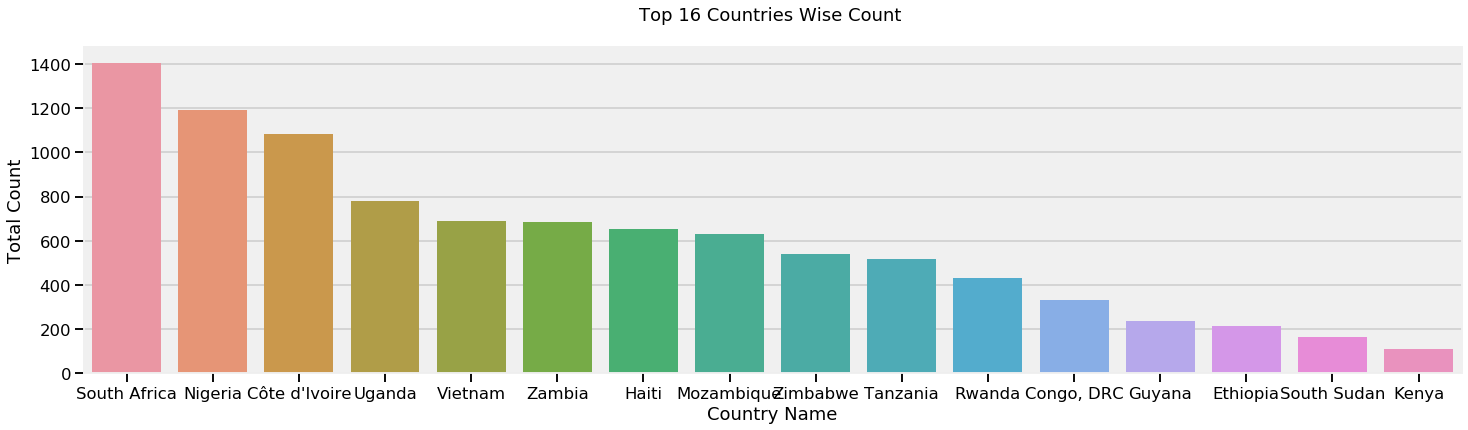

In [111]:
DataSet = DataSet.dropna()
ItemCount = DataSet["Country"].value_counts().nlargest(43)
print("Top 43 Countries Wise Count \n")
print(ItemCount)
sn.set_context("talk",font_scale=1)
plt.figure(figsize=(22,6))
sn.countplot(DataSet['Country'],order = DataSet['Country'].value_counts().nlargest(16).index)
plt.title('Top 16 Countries Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Country Name')

# Shipment Mode percentage wise Pie Chart

In [112]:
ShippingMode = DataSet["Shipment Mode"].value_counts()
labels = (np.array(ShippingMode.index))
sizes = (np.array((ShippingMode / ShippingMode.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Shipment Mode")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)

show_image = None
if export_flag:    
    chart_studio.plotly.image.save_as(fig, filename='shipment-mode-plot.png')
    show_image = Image('shipment-mode-plot.png')
else:
    py.iplot(fig, filename="Shipment Mode")
    
show_image

# ETL

In [113]:
regex = {
    "id_number": ":\d*"
}

def change_to_number(freight_cost_usd):
    match = re.search(regex['id_number'], freight_cost_usd, re.IGNORECASE)
    if match:
        id = match.group(0).replace(':','')
        filtered = DataSet.query("ID == "+id)
        return filtered['Freight_Cost_USD'].item()
    else:
        return freight_cost_usd
    
def convert_to_number(weight):
    match = re.search(regex['id_number'], weight, re.IGNORECASE)
    if match:
        id = match.group(0).replace(':','')
        filtered = DataSet.query("ID == "+id)
        return filtered['Weight (Kilograms)'].item()
    else:
        return weight

In [114]:
DataSet['Freight_Cost_USD_Clean'] = DataSet['Freight_Cost_USD'].apply(change_to_number)
DataSet['Weight_Kilograms_Clean'] = DataSet['Weight (Kilograms)'].apply(convert_to_number)

/home/jhonny/anaconda3/envs/supply-chain/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning:

`item` has been deprecated and will be removed in a future version

/home/jhonny/anaconda3/envs/supply-chain/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning:

`item` has been deprecated and will be removed in a future version



In [115]:
freight_cost_indexes = DataSet.index[(DataSet['Freight_Cost_USD_Clean'] == 'Freight Included in Commodity Cost') 
                        | (DataSet['Freight_Cost_USD_Clean'] == 'Invoiced Separately')].tolist()
weight_indexes = DataSet.index[DataSet['Weight_Kilograms_Clean'] == 'Weight Captured Separately'].tolist()
shipment_indexes = DataSet.index[DataSet['Shipment Mode'] == 'no_value'].tolist()
print("Freight_Cost_USD_Clean indexes:",len(freight_cost_indexes))
print("Weight_Kilograms_Clean indexes:",len(weight_indexes))
print("Shipment Mode indexes:         ",len(shipment_indexes))

indexes = list(set(freight_cost_indexes + weight_indexes + shipment_indexes))
print("Indexes:",len(indexes))
DataSetClean = DataSet.drop(indexes)

print("Size:", DataSetClean.shape)

DataSetClean[['Unit of Measure (Per Pack)', 'Line Item Quantity', 'Pack Price', 'Unit Price', 'Weight (Kilograms)',
                          'Country', 'Shipment Mode', 'Freight_Cost_USD']]

Freight_Cost_USD_Clean indexes: 1786
Weight_Kilograms_Clean indexes: 1633
Shipment Mode indexes:          360
Indexes: 2142
Size: (8182, 35)


,Unit of Measure (Per Pack),Line Item Quantity,Pack Price,Unit Price,Weight (Kilograms),Country,Shipment Mode,Freight_Cost_USD
0,30,19,29.00,0.97,13,Côte d'Ivoire,Air,780.34
1,240,1000,6.20,0.03,358,Vietnam,Air,4521.5
2,100,500,80.00,0.80,171,Côte d'Ivoire,Air,1653.78
3,60,31920,3.99,0.07,1855,Vietnam,Air,16007.06
4,60,38000,3.20,0.05,7590,Vietnam,Air,45450.08
...,...,...,...,...,...,...,...,...
10316,60,15000,6.52,0.11,1547,Nigeria,Air Charter,3410
10317,30,6724,3.12,0.10,See DN-4282 (ID#:83919),Nigeria,Air,See DN-4282 (ID#:83919)
10318,60,205243,3.60,0.06,See DN-4307 (ID#:83920),Zimbabwe,Truck,See DN-4307 (ID#:83920)
10319,60,166571,3.60,0.06,See DN-4307 (ID#:83920),Zimbabwe,Truck,See DN-4307 (ID#:83920)


In [116]:
shipment_mode = DataSetClean['Shipment Mode'].unique()
print('shipment mode', shipment_mode, '\n')

countries = DataSetClean['Country'].unique()
print('countries', countries, '\n')

manufacturing = DataSetClean['Manufacturing Site'].unique()
print('manufacturing', manufacturing)

shipment mode ['Air' 'Truck' 'Air Charter' 'Ocean'] 

countries ["Côte d'Ivoire" 'Vietnam' 'Nigeria' 'Tanzania' 'Zambia' 'Rwanda' 'Haiti'
 'Ethiopia' 'Guyana' 'Zimbabwe' 'Namibia' 'Botswana' 'Mozambique' 'Kenya'
 'Uganda' 'Senegal' 'Benin' 'Lesotho' 'Swaziland' 'Angola' 'Pakistan'
 'Sierra Leone' 'Cameroon' 'South Sudan' 'Burundi' 'South Africa' 'Malawi'
 'Congo, DRC' 'Dominican Republic' 'Sudan' 'Mali' 'Ghana' 'Togo'
 'Afghanistan' 'Guatemala' 'Liberia' 'Guinea' 'Libya'] 

manufacturing ['Ranbaxy Fine Chemicals LTD' 'Aurobindo Unit III, India'
 'ABBVIE GmbH & Co.KG Wiesbaden' 'Ranbaxy, Paonta Shahib, India'
 'Trinity Biotech, Plc' 'Cipla, Goa, India' 'Premier Med. Corp Ltd. India'
 'BMS Meymac, France' 'Chembio Diagnostics Sys. Inc.'
 'ABBVIE Ludwigshafen Germany' 'Inverness Japan'
 'Pacific Biotech, Thailand' 'Standard Diagnostics, Korea'
 'Gilead(Nycomed) Oranienburg DE' 'Bio-Rad Laboratories'
 'Mylan (formerly Matrix) Nashik' 'Novartis Pharma AG, Switzerland'
 'Not Applicable' 'Ipc

In [117]:
DataSetClean['country_encoded'] = DataSetClean['Country'].map( {
    'South Africa': 1, 
    'Nigeria': 2,
    "Côte d'Ivoire": 3, 
    'Uganda': 4,
    'Vietnam': 5,
    'Zambia': 6, 
    'Haiti': 7, 
    'Mozambique': 8,
    'Zimbabwe': 9,
    'Tanzania': 10, 
    'Rwanda': 11, 
    'Congo, DRC': 12, 
    'Guyana': 13, 
    'Ethiopia': 14,
    'South Sudan': 15,
    'Kenya': 16, 
    'Burundi': 17, 
    'Namibia': 18, 
    'Cameroon': 19, 
    'Botswana': 20, 
    'Ghana': 21, 
    'Dominican Republic': 22, 
    'Sudan': 23, 
    'Swaziland': 24,
    'Mali': 25, 
    'Pakistan': 26,
    'Guatemala': 27,
    'Malawi': 28, 
    'Benin': 29, 
    'Lebanon': 30, 
    'Libya': 31, 
    'Angola': 32, 
    'Liberia': 33,
    'Lesotho': 34,
    'Sierra Leone': 35,
    'Togo': 36, 
    'Afghanistan': 37,
    'Senegal': 38, 
    'Kyrgyzstan': 39,
    'Burkina Faso': 40,
    'Kazakhstan': 41,
    'Guinea': 42,
    'Belize': 43 } ).astype(int)
DataSetClean['shipment_mode_encoded'] = DataSetClean['Shipment Mode'].map({ 
    'Air': 1,
    'Truck': 2,
    'Air Charter': 3,
    'Ocean': 4 }).astype(int)

DataSetClean['manufacturing_site_encoded'] = DataSetClean['Manufacturing Site'].map({ 
    'Ranbaxy Fine Chemicals LTD': 1,
    'Aurobindo Unit III, India': 2,
    'ABBVIE GmbH & Co.KG Wiesbaden': 3,
    'Ranbaxy, Paonta Shahib, India': 4,
    'Trinity Biotech, Plc': 5,
    'Cipla, Goa, India': 6,
    'Premier Med. Corp Ltd. India': 7,
    'BMS Meymac, France': 8,
    'Chembio Diagnostics Sys. Inc.': 9,
    'ABBVIE Ludwigshafen Germany': 10,
    'Inverness Japan': 11,
    'Pacific Biotech, Thailand': 12,
    'Standard Diagnostics, Korea': 13,
    'Gilead(Nycomed) Oranienburg DE': 14,
    'Bio-Rad Laboratories': 15,
    'Mylan (formerly Matrix) Nashik': 16,
    'Novartis Pharma AG, Switzerland': 17,
    'Not Applicable': 18,
    'Ipca Dadra/Nagar Haveli IN': 19,
    'MSD, Haarlem, NL': 20,
    'Gland Pharma Ltd Pally Factory': 21,
    'ABBVIE (Abbott) Logis. UK': 22,
    'Hetero Unit III Hyderabad IN': 23,
    'ABBVIE (Abbott) France': 24,
    'Strides, Bangalore, India.': 25,
    'Cipla, Patalganga, India': 26,
    'Aspen-OSD, Port Elizabeth, SA': 27,
    'KHB Test Kit Facility, Shanghai China': 28,
    'Inverness USA': 29,
    "MSD Midrand, J'burg, SA": 30,
    'OMEGA Diagnostics, UK': 31,
    'Roche Madrid': 32,
    'INVERNESS ORGENICS LINE': 33,
    'GSK Aranda': 34,
    'Novartis Pharma Suffern, USA': 35,
    'Roche Basel': 36,
    "ABBVIE (Abbott) St. P'burg USA": 37,
    'GSK Mississauga (Canada)': 38,
    'Micro Labs Ltd. (Brown & Burk), India': 39,
    'Meditab (for Cipla) Daman IN': 40,
    'Medopharm Malur Factory, INDIA': 41,
    'Orasure Technologies, Inc USA': 42,
    'Weifa A.S., Hausmanngt. 6, P.O. Box 9113 GrÃ¸nland, 0133, Oslo, Norway': 43,
    'GSK Cape Town Factory (South Africa)': 44,
    'MSD Manati, Puerto Rico, (USA)': 45,
    'MSD Elkton USA': 46,
    'GSK Ware (UK)': 47,
    'MSD Patheon, Canada': 48,
    'GSK Crawley': 49,
    'Emcure Plot No.P-2, I.T-B.T. Park, Phase II, MIDC, Hinjwadi, Pune, India': 50,
    'MSD South Granville Australia': 51,
    'Alere Medical Co., Ltd.': 52,
    'Premier Medical Corporation': 53,
    'Janssen-Cilag, Latina, IT': 54,
    'Aurobindo Unit VII, IN': 55,
    'Micro labs, Verna, Goa, India': 56,
    'Orasure Technologies, Inc': 57,
    'Mylan,  H-12 & H-13, India': 58,
    'Hetero, Jadcherla, unit 5, IN': 59,
    'Bristol-Myers Squibb Anagni IT': 60,
    'Medochemie Factory A, CY': 61,
    'Cipla Ltd A-42 MIDC Mahar. IN': 62,
    'bioLytical Laboratories': 63,
    'EY Laboratories, USA': 64,
    'Micro Labs, Hosur, India': 65,
    'Remedica, Limassol, Cyprus': 66,
    'INVERNESS ANY': 67,
    'Guilin OSD site, No 17, China': 68,
    'Cipla, Kurkumbh, India': 69,
    'GSK Barnard Castle UK': 70,
    'Janssen Ortho LLC, Puerto Rico': 71,
    'Gland Pharma, Hyderabad, IN': 72,
    'Access BIO, L.C.': 73,
    'Human Diagnostic': 74,
    'BMS Evansville, US': 75,
    'Mepro Pharm Wadhwan Unit II': 76,
    'Ranbaxy per Shasun Pharma Ltd': 77,
    'Ranbaxy per Shasun Pharma': 78,
    'Macleods Daman Plant INDIA': 79
}).astype(int)

# Change data type of columns

In [118]:
DataSetClean['Freight_Cost_USD_Clean'] = pd.to_numeric(DataSetClean['Freight_Cost_USD_Clean'])
DataSetClean['Weight_Kilograms_Clean'] = pd.to_numeric(DataSetClean['Weight_Kilograms_Clean'])
DataSetClean.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


# Machine Learning Modeling

In [119]:
predictors = DataSetClean[['Unit of Measure (Per Pack)', 'Line Item Quantity', 'Pack Price', 'Unit Price', 'Weight_Kilograms_Clean',
                          'country_encoded', 'shipment_mode_encoded', 'manufacturing_site_encoded']]
predictors

,Unit of Measure (Per Pack),Line Item Quantity,Pack Price,Unit Price,Weight_Kilograms_Clean,country_encoded,shipment_mode_encoded,manufacturing_site_encoded
0,30,19,29.00,0.97,13,3,1,1
1,240,1000,6.20,0.03,358,5,1,2
2,100,500,80.00,0.80,171,3,1,3
3,60,31920,3.99,0.07,1855,5,1,4
4,60,38000,3.20,0.05,7590,5,1,2
...,...,...,...,...,...,...,...,...
10316,60,15000,6.52,0.11,1547,2,3,2
10317,30,6724,3.12,0.10,6183,2,1,25
10318,60,205243,3.60,0.06,25880,9,2,6
10319,60,166571,3.60,0.06,25880,9,2,58


In [120]:
predictors.describe()

,Unit of Measure (Per Pack),Line Item Quantity,Pack Price,Unit Price,Weight_Kilograms_Clean,country_encoded,shipment_mode_encoded,manufacturing_site_encoded
count,"8,182.00","8,182.00","8,182.00","8,182.00","8,182.00","8,182.00","8,182.00","8,182.00"
mean,75.33,"21,201.81",20.68,0.60,"4,545.52",7.52,1.48,15.84
std,76.55,"42,549.60",41.77,2.35,"13,661.93",5.41,0.79,15.85
min,1.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00
25%,30.00,847.25,3.78,0.07,283.00,3.00,1.00,2.00
50%,60.00,"4,449.50",8.26,0.15,"1,351.50",6.00,1.00,11.00
75%,90.00,"21,505.50",20.50,0.41,"4,481.25",10.00,2.00,23.00
max,"1,000.00","619,999.00","1,250.00",30.00,"857,354.00",42.00,4.00,79.00


In [121]:
targets = DataSetClean.Freight_Cost_USD_Clean
targets

0                     780.34
1                   4,521.50
2                   1,653.78
3                  16,007.06
4                  45,450.08
                ...         
10316               3,410.00
10317              47,281.56
10318              46,111.55
10319              46,111.55
10320              14,734.92
Name: Freight_Cost_USD_Clean, Length: 8182, dtype: float64

# Correlations

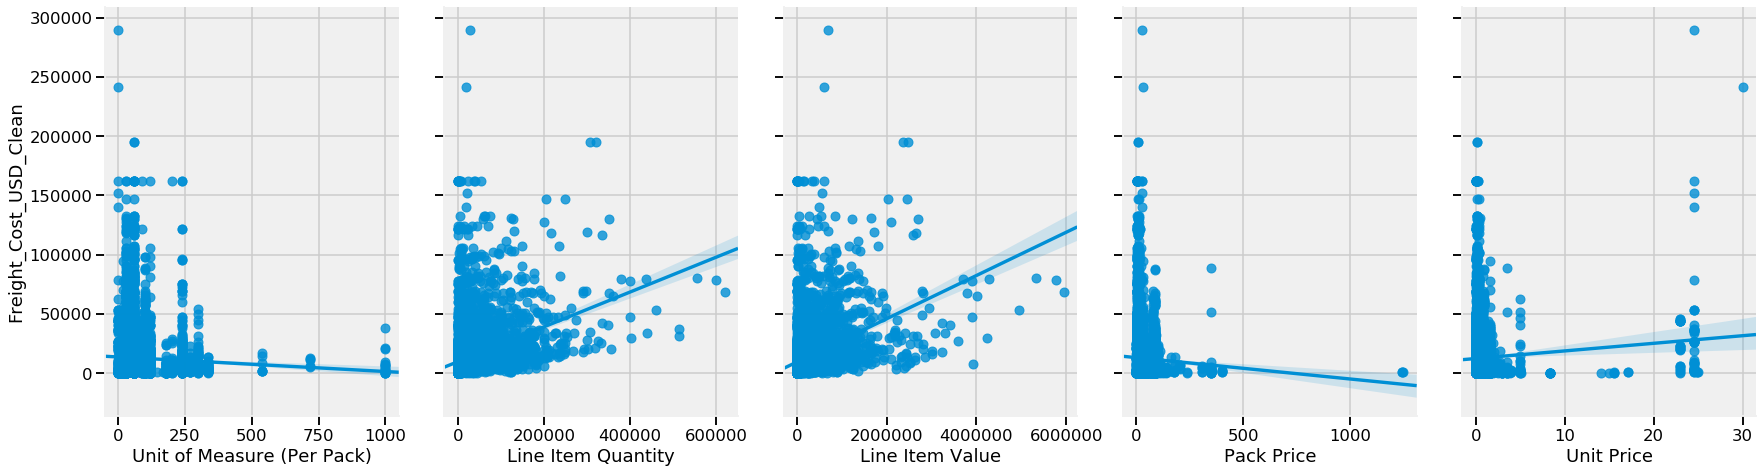

In [122]:
sn.pairplot(DataSetClean, 
            x_vars=['Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price'],
            y_vars='Freight_Cost_USD_Clean', height=7, aspect=0.7, kind='reg')

# Test and Training Data

In [123]:
train_features, test_features, train_targets, test_targets = train_test_split(predictors, targets, test_size=0.2, random_state=3)

print('test features shape: ', test_features.shape)
print('test targets shape: ', test_targets.shape)

print('train features shape: ', train_features.shape)
print('train targets shape: ', train_targets.shape)

test features shape:  (1637, 8)
test targets shape:  (1637,)
train features shape:  (6545, 8)
train targets shape:  (6545,)


# Decision Tree Regressor

In [124]:
tree_regressor = DecisionTreeRegressor(max_depth=15) # MAE 6.08 minutes, R2 -1.20

tree_regressor = tree_regressor.fit(train_features, train_targets)

print('node_count => ', tree_regressor.tree_.node_count)

tree_regressor.get_params()

node_count =>  4361


{'criterion': 'mse',
 'max_depth': 15,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

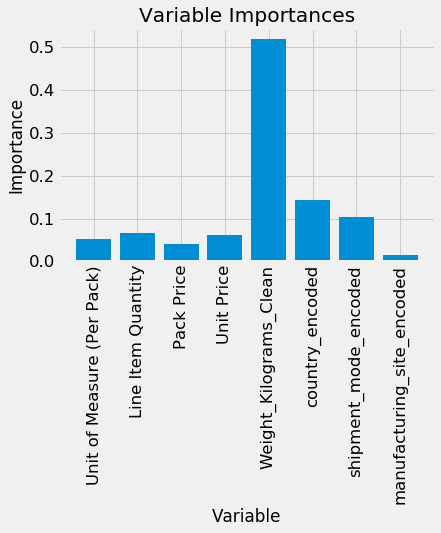

In [125]:
# Saving feature names for later use
feature_list = list(predictors.columns)
importances = list(tree_regressor.feature_importances_)

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# Verify model using Test Data

In [126]:
#Predecimos para los valores del grupo Test
tree_predictions = tree_regressor.predict(test_features)
df = pd.DataFrame({'Actual':test_targets, 'Predicted':tree_predictions})  
df

,Actual,Predicted
10026,"3,526.27","3,651.01"
5425,"1,400.91",604.32
2860,"11,314.20","13,731.60"
7063,"6,036.96","5,056.74"
1750,"2,989.45","3,651.01"
...,...,...
9356,"2,528.69","3,651.01"
1400,"1,053.86",734.66
317,"12,770.05","14,829.77"
3440,365.48,350.02


# Metrics

In [127]:
results = pd.DataFrame({'Score':['Mean Absolute Error', 'Root Mean Squared Error', 'Mean Squared Error', 'R Square']})
tree_score = [metrics.mean_absolute_error(test_targets, tree_predictions),
             np.sqrt(metrics.mean_squared_error(test_targets, tree_predictions)),
             metrics.mean_squared_error(test_targets, tree_predictions)/10000,
             metrics.r2_score(test_targets, tree_predictions)*10000]
results['Tree Desicion'] = tree_score

print('Mean Absolute Error:     {} [$]'.format(results.iloc[0, 1]))    
print('Root Mean Squared Error: {} [$]'.format(results.iloc[1, 1]))
print('Mean Squared Error:      {} [$]'.format(results.iloc[2, 1]))
print('R Square:                {} [%]'.format(results.iloc[3, 1])) # 1 is better
results

Mean Absolute Error:     5031.79125715209 [$]
Root Mean Squared Error: 11680.51800714098 [$]
Mean Squared Error:      13643.450091514469 [$]
R Square:                6200.809584637607 [%]


,Score,Tree Desicion
0,Mean Absolute Error,"5,031.79"
1,Root Mean Squared Error,"11,680.52"
2,Mean Squared Error,"13,643.45"
3,R Square,"6,200.81"


# Random Forest Regressor

In [128]:
rand_forest_regressor = RandomForestRegressor(n_estimators=500, random_state=3)

rand_forest_regressor = rand_forest_regressor.fit(train_features, train_targets)

rand_forest_regressor.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 3,
 'verbose': 0,
 'warm_start': False}

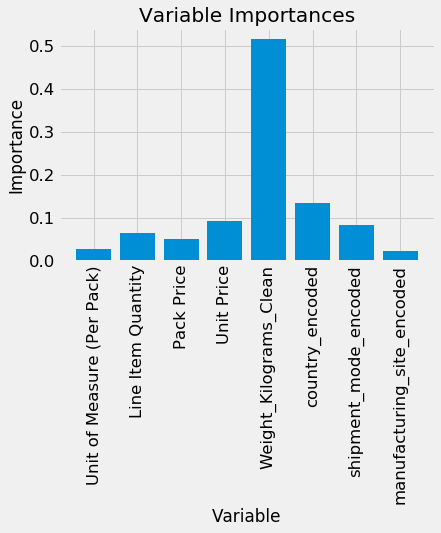

In [129]:
# Saving feature names for later use
feature_list = list(predictors.columns)
importances = list(rand_forest_regressor.feature_importances_)

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation='vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# Verify Model using Test Data

In [130]:
rf_predictions = rand_forest_regressor.predict(test_features)
df = pd.DataFrame({'Actual':test_targets, 'Predicted':rf_predictions})  
df

,Actual,Predicted
10026,"3,526.27","3,832.25"
5425,"1,400.91","1,468.25"
2860,"11,314.20","13,243.27"
7063,"6,036.96","5,802.95"
1750,"2,989.45","3,964.51"
...,...,...
9356,"2,528.69","3,675.51"
1400,"1,053.86","1,513.39"
317,"12,770.05","14,292.23"
3440,365.48,"1,623.07"


# Metrics

In [131]:
rf_score = [metrics.mean_absolute_error(test_targets, rf_predictions),
            np.sqrt(metrics.mean_squared_error(test_targets, rf_predictions)),
            metrics.mean_squared_error(test_targets, rf_predictions)/10000,
            metrics.r2_score(test_targets, rf_predictions)*10000]
results['Random Forest'] = rf_score

print('Mean Absolute Error:     {} [$]'.format(results.iloc[0, 2]))    
print('Root Mean Squared Error: {} [$]'.format(results.iloc[1, 2]))
print('Mean Squared Error:      {} [$]'.format(results.iloc[2, 2]))
print('R Square:                {} [%]'.format(results.iloc[3, 2])) # 1 is better
results

Mean Absolute Error:     4416.38844743828 [$]
Root Mean Squared Error: 9219.642342163452 [$]
Mean Squared Error:      8500.180491741317 [$]
R Square:                7633.017745770982 [%]


,Score,Tree Desicion,Random Forest
0,Mean Absolute Error,"5,031.79","4,416.39"
1,Root Mean Squared Error,"11,680.52","9,219.64"
2,Mean Squared Error,"13,643.45","8,500.18"
3,R Square,"6,200.81","7,633.02"


# Comparison

In [132]:
model_name = ['DesicionTree', 'RandomForest']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=model_name,
    y=results.iloc[0,1:],
    name='Mean Absolute Error',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=model_name,
    y=results.iloc[1,1:],
    name='Root Mean Squared Error',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=model_name,
    y=results.iloc[2,1:],
    name='Mean Squared Error',
    marker_color='mediumslateblue'
))
fig.add_trace(go.Bar(
    x=model_name,
    y=results.iloc[3,1:],
    name='R Square',
    marker_color='darkslateblue'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.layout.update(barmode='group', xaxis_tickangle=-45)

show_image = None
if export_flag:
    chart_studio.plotly.image.save_as(fig, filename='comparison-plot.png')
    show_image = Image('comparison-plot.png')
else:
    fig.show()

show_image

# Conclusion

* Los features seleccionados fueron tratados para eliminar todos los datos nulos.
* Los features seleccionados fueron tratados para transformar con valores validos.
* Los features los features claves fueron **el Peso, el modo de envio y el pais destino**.
* Se eligieron los algoritmos de Arbol de Desición y Random Forest para la predicción del precio de envio, donde el mejor resultado fue obtenido por el Random Forest.